Виконання за першою інтерполяційною формулою : 
f(0.184) = 5.492499555681074
f(0.189) = 5.354118656465715
f(0.193) = 5.245345688151244
f(0.221) = 4.598203735137074
f(0.227) = 4.481175088307406
f(0.216) = 4.7014070432817165
Виконання за другою інтерполяційною формулою : 
f(0.184) = 5.492499555681074
f(0.189) = 5.354118656465715
f(0.193) = 5.245345688151244
f(0.221) = 4.598203735137074
f(0.227) = 4.481175088307406
f(0.216) = 4.7014070432817165


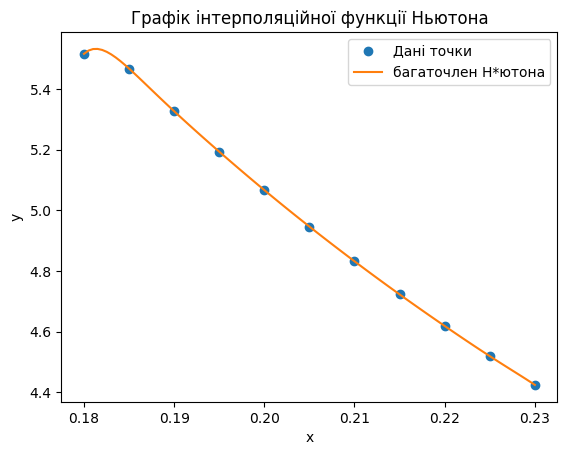

In [7]:
import numpy as np
from math import factorial
import matplotlib.pyplot as plt
# задані точки
x = np.array ([0.18, 0.185, 0.19, 0.195, 0.2, 0.205, 0.21, 0.215, 0.22, 0.225, 0.23])
y = np.array([5.5154, 5.4669, 5.3263, 5.1930, 5.0664, 4.9461, 4.8317, 4.7226, 4.6185, 4.5191, 4.4242])
# перша інтерполяційна формула
def first_interpolation(x, y, x0):
    n = len(x)
    f = np.zeros((n, n))
    f[:, 0] = y
    for j in range(1, n):
        for i in range(n - j):
            f[i, j] = (f[i+1, j-1] - f[i, j-1]) / (x[i+j] - x[i])
    ans = 0
    for j in range(n):
        prod = f[0, j]
        for i in range(j):
            prod *= (x0 - x[i])
        ans += prod
        
    return ans

# друга інтерполяційна формула
def second_interpolation(x, y, x0):
    n = len(x)
    f = np.zeros((n, n))
    f[:, 0] = y
    for j in range(1, n):
        for i in range(n - j):
            f[i, j] = (f[i+1, j-1] - f[i, j-1]) / (x[i+j] - x[i])
    ans = f[0, 0]
    for j in range(1, n):
        prod = f[0, j]
        for i in range(j):
            prod *= (x0 - x[i])
        ans += prod
    return ans

x1 = np.array([0.184, 0.189, 0.193, 0.221, 0.227, 0.216])
print("Виконання за першою інтерполяційною формулою : ")
for i in x1:
    y1 = first_interpolation(x, y, i)
    print(f"f({i}) = {y1}")
print("Виконання за другою інтерполяційною формулою : ")
for i in x1:
    y2 = second_interpolation(x, y, i)
    print(f"f({i}) = {y2}")

# будуємо графік інтерполяційної функції
xx = np.linspace(np.min(x), np.max(x), 100)
yy = np.zeros_like(xx)
for i in range(len(xx)):
    yy[i] = second_interpolation(x, y, xx[i])
plt.plot(x, y, 'o', label='Дані точки')
plt.plot(xx, yy, label='багаточлен Н*ютона')
plt.title("Графік інтерполяційної функції Ньютона")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
